<a href="https://colab.research.google.com/github/15gsaavedra/DDDS-My-Projects/blob/main/Gabriel_Saavedra_SQL_1_Chinook_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db

In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Jun 30 11:18 .
drwxr-xr-x 1 root root   4096 Jun 30 11:17 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Jun 30 11:18 chinook.zip
drwxr-xr-x 4 root root   4096 Jun 26 13:34 .config
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data


In [ ]:
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


- [ER diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)


What are the names for each MediaTypeId?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  MediaTypeId, Name
from
  media_types

MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


#### WHERE


What are the names and GenreIds for tracks lasting less than 10000 milliseconds?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  Name, GenreId, Milliseconds
from
  tracks
where
  Milliseconds < 10000

Name                      GenreId  Milliseconds
------------------------  -------  ------------
Now Sports                4        4884        
A Statistic               4        6373        
Oprah                     4        6635        
É Uma Partida De Futebol  1        1071        
Commercial 1              17       7941        


#### AND


What are the names and composers for recorded scifi and fantasy videos?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  Composer, Name
from
  tracks
where
  MediaTypeId = 3
and
  GenreId = 20

Composer  Name                             
--------  ---------------------------------
          Crossroads, Pt. 1                
          Crossroads, Pt. 2                
          Battlestar Galactica, Pt. 1      
          Battlestar Galactica, Pt. 2      
          Battlestar Galactica, Pt. 3      
          Lost Planet of the Gods, Pt. 1   
          Lost Planet of the Gods, Pt. 2   
          The Lost Warrior                 
          The Long Patrol                  
          The Gun On Ice Planet Zero, Pt. 1
          The Gun On Ice Planet Zero, Pt. 2
          The Magnificent Warriors         
          The Young Lords                  
          The Living Legend, Pt. 1         
          The Living Legend, Pt. 2         
          Fire In Space                    
          War of the Gods, Pt. 1           
          War of the Gods, Pt. 2           
          The Man With Nine Lives          
          Murder On the Rising Star        
          Greetings from Earth, 

#### OR


Which AAC audio files are not protected?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  Name
from
  tracks
where
  MediaTypeId = 4
or
  MediaTypeId = 5

Name                                                                          
------------------------------------------------------------------------------
War Pigs                                                                      
Symphony No. 104 in D Major "London": IV. Finale: Spiritoso                   
SCRIABIN: Prelude in B Major, Op. 11, No. 11                                  
Prometheus Overture, Op. 43                                                   
Sonata for Solo Violin: IV: Presto                                            
Étude 1, In C Major - Preludio (Presto) - Liszt                               
Concerto for Violin, Strings and Continuo in G Major, Op. 3, No. 9: I. Allegro
Amanda                                                                        
Despertar                                                                     
Din Din Wo (Little Child)                                                     
Distance                                            

#### LIKE (with % or _ wildcard)


Do any employees have a last name starting with S?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  LastName, FirstName
from
  employees
where
  LastName like 'S%'

#### BETWEEN


Do any employees have a last name starting with a letter between L and P?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  LastName, FirstName
from
  employees
where
  LastName between 'L' and 'P'

LastName  FirstName
--------  ---------
Mitchell  Michael  


#### LIMIT



What are the names and lengths of the 10 longest recordings?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  Name, Milliseconds
from
  tracks
order by Milliseconds desc
limit 10

Name                         Milliseconds
---------------------------  ------------
Occupation / Precipice       5286953     
Through a Looking Glass      5088838     
Greetings from Earth, Pt. 1  2960293     
The Man With Nine Lives      2956998     
Battlestar Galactica, Pt. 2  2956081     
Battlestar Galactica, Pt. 1  2952702     
Murder On the Rising Star    2935894     
Battlestar Galactica, Pt. 3  2927802     
Take the Celestra            2927677     
Fire In Space                2926593     


### Sorting and Grouping


#### ORDER BY


What are the names and lengths of the 10 longest recordings?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  Name, Milliseconds
from
  tracks
order by Milliseconds desc
limit 10

Name                         Milliseconds
---------------------------  ------------
Occupation / Precipice       5286953     
Through a Looking Glass      5088838     
Greetings from Earth, Pt. 1  2960293     
The Man With Nine Lives      2956998     
Battlestar Galactica, Pt. 2  2956081     
Battlestar Galactica, Pt. 1  2952702     
Murder On the Rising Star    2935894     
Battlestar Galactica, Pt. 3  2927802     
Take the Celestra            2927677     
Fire In Space                2926593     


#### DISTINCT


What genres are associated with each GenreId?

In [ ]:
%%script sqlite3 --column --header chinook.db

select distinct
  GenreId, Name
from
  genres

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     
6        Blues             
7        Latin             
8        Reggae            
9        Pop               
10       Soundtrack        
11       Bossa Nova        
12       Easy Listening    
13       Heavy Metal       
14       R&B/Soul          
15       Electronica/Dance 
16       World             
17       Hip Hop/Rap       
18       Science Fiction   
19       TV Shows          
20       Sci Fi & Fantasy  
21       Drama             
22       Comedy            
23       Alternative       
24       Classical         
25       Opera             


#### GROUP BY



How many recordings are there of each media type?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  MediaTypeId, count(1)
from
  tracks
group by
  MediaTypeId

MediaTypeId  count(1)
-----------  --------
1            3034    
2            237     
3            214     
4            7       
5            11      


### Aggregates


#### MAX


What is the highest unit price for a track?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  max(UnitPrice)
from
  tracks

max(UnitPrice)
--------------
1.99          


#### MIN


What is the lowest unit price for a track?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  min(UnitPrice)
from
  tracks

min(UnitPrice)
--------------
0.99          


#### SUM


How much would it cost to buy every priced track?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  sum(UnitPrice)
from
  tracks

sum(UnitPrice) 
---------------
3680.9699999997


#### AVG


What is the average unit price for a track?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  avg(UnitPrice)
from
  tracks

avg(UnitPrice)  
----------------
1.05080502426483


#### COUNT



How many recordings are there of each genre?

In [ ]:
%%script sqlite3 --column --header chinook.db

select
  g.Name as 'Genre Name',
  count(1) as 'Count'
from
  tracks as t
join
  genres as g
on
  g.GenreId = t.GenreId
group by
  g.Name
order by Count desc

Genre Name          Count
------------------  -----
Rock                1297 
Latin               579  
Metal               374  
Alternative & Punk  332  
Jazz                130  
TV Shows            93   
Blues               81   
Classical           74   
Drama               64   
R&B/Soul            61   
Reggae              58   
Pop                 48   
Soundtrack          43   
Alternative         40   
Hip Hop/Rap         35   
Electronica/Dance   30   
World               28   
Heavy Metal         28   
Sci Fi & Fantasy    26   
Easy Listening      24   
Comedy              17   
Bossa Nova          15   
Science Fiction     13   
Rock And Roll       12   
Opera               1    


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [ ]:
query1 = '''
  select
    g.Name as 'Genre Name',
    count(1) as 'Count'
  from
    tracks as t
  join
    genres as g
  on
    g.GenreId = t.GenreId
  group by
    g.Name
  order by Count desc
'''

In [ ]:
with db.connect("chinook.db") as db_con:
  genre_counts = pd.read_sql_query( query1 , db_con)
genre_counts

,Genre Name,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


In [ ]:
genre_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Genre Name  25 non-null     object
 1   Count       25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


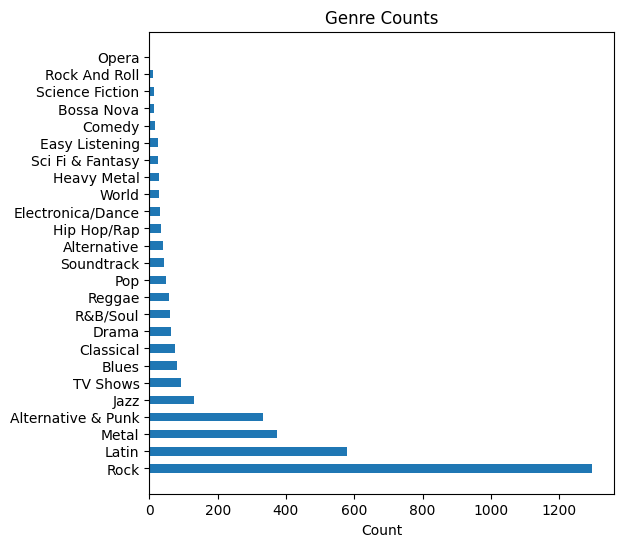

In [ ]:
plt.figure(figsize = (6,6))
plt.barh(np.arange(len(genre_counts['Genre Name'])), width = genre_counts['Count'], height = .5);
plt.yticks(np.arange(len(genre_counts['Genre Name'])), genre_counts['Genre Name']);
plt.xlabel('Count');
plt.title('Genre Counts');

In [ ]:
query2 = '''
  select
    UnitPrice
  from
    tracks
'''

In [ ]:
with db.connect("chinook.db") as db_con:
  prices = pd.read_sql_query( query2 , db_con)
prices.head()

,UnitPrice
0,0.99
1,0.99
2,0.99
3,0.99
4,0.99


In [ ]:
print(prices['UnitPrice'].unique())

[0.99 1.99]


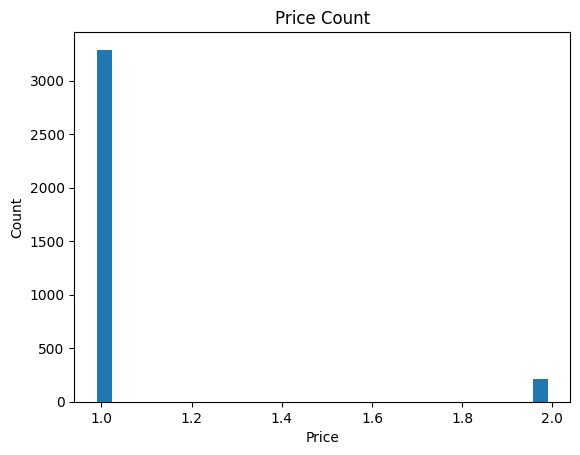

In [ ]:
plt.hist(prices['UnitPrice'], bins = 30);
plt.title('Price Count');
plt.xlabel('Price');
plt.ylabel('Count');

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data
